# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def review(df): 
    """функция для отображения общей информации"""
    info = display(df.head(10)), df.info(), display(df.describe(), df.describe(include=['object', 'bool']))

## Изученим данные из файла

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal=',')

In [4]:
review(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


,last_price,total_area,first_day_exposition,ceiling_height,floors_total,living_area,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,14504,23613,21796,2775,23699,23699,21421,12180,23650,18157,18180,18181,8079,18181,9110,20518
unique,2978,2182,1491,183,36,1782,2,2,2,971,6,364,8275,7642,4,995,4,1096,1141
top,4500000.0,45.0,2018-02-01T00:00:00,2.5,5.0,18.0,False,False,False,6.0,1.0,Санкт-Петербург,37434.0,8460.0,0.0,441.0,0.0,427.0,45.00000000000001
freq,342,419,368,3515,5788,882,2725,23550,23632,1300,4195,15721,61,61,10106,67,9071,70,880


### Вывод

- ```last_price``` - неверный тип данных;
- ```total_area``` - неверный тип данных;
- ```first_day_exposition``` - неверный тип данных;
- ```ceiling_height``` - пропущенные значения;
- ```floors_total``` - пропущенные значения, неверный тип данных;
- ```living_area``` - пропущенные значения, неверный тип данных;
- ```is_apartment``` - пропущенные значения, неверный тип данных;
- ```kitchen_area``` - пропущенные значения, неверный тип данных;
- ```balcony``` - пропущенные значения;
- ```locality_name``` - пропущенные значения;
- ```airports_nearest``` - пропущенные значения, неверный тип данных;
- ```cityCenters_nearest``` - пропущенные значения, неверный тип данных;
- ```parks_around3000``` - пропущенные значения, неверный тип данных;
- ```parks_nearest``` - пропущенные значения, неверный тип данных;
- ```ponds_around3000``` - пропущенные значения, неверный тип данных;
- ```ponds_nearest``` - пропущенные значения, неверный тип данных;
- ```days_exposition``` - пропущенные значения, неверный тип данных.


## Предобработка данных

### Заполним пропуски, преобразуем типы данных.

Посмотрим на доли пропущенных значений

In [5]:
df_filter = df[[
    'ceiling_height',
    'floors_total',
    'living_area',
    'is_apartment',
    'kitchen_area',
    'balcony',
    'locality_name',
    'airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
    'days_exposition'
]]
share_df_filter = (len(df_filter) - df_filter.count()) / len(df_filter) * 100
share_df_filter.round(2)

ceiling_height         38.80
floors_total            0.36
living_area             8.03
is_apartment           88.29
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

Пропущенные данные с высотой потолков в столбце `ceiling_height` заменим на медианные значения.

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Пустые значения в столбцах с жилой площадью - ```living_area``` и площадью кухни - ```kitchen_area``` преобразуем к данных `float64` и заменим на медианные значения с привязкой по общей площади и количеством комнат.

In [28]:
for column in df[['living_area',
                  'kitchen_area']]:
    df[column] = pd.to_numeric(df[column])

In [29]:
df['living_area'] = df['living_area'].fillna(df.groupby(['total_area', 'rooms'])['living_area'].transform('median'))

In [30]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['total_area', 'rooms'])['kitchen_area'].transform('median'))

- преобразуем тип данных столбцов ```last_price``` и ```total_area```.

In [10]:
df['last_price'] = pd.to_numeric(df['last_price']).astype('Int64')
df['total_area'] = pd.to_numeric(df['total_area'])

- тип данных столбца ```first_day_exposition``` заменим на ```datetime``` и приведем в формат не отображающий информацию о времени, т.к. точное время не указано по всем данныи.

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

- пропуски в столбце ```floors_total``` оставляем пустым, т.к. нет данных к которым можно было бы осуществить привязку;

- преобразуем тип данных в столбце ```floors_total```

In [12]:
df['floors_total'] = pd.to_numeric(df['floors_total']).astype('Int64')

- согласно документации данные из столбца ```is_apartment``` должны хранить булев тип данных - проведем замену. Следует учитывать, что при изменении типа данных на ```bool``` все пропущенные значения будут равны ```True``` - в таком виде данные будут не верны. Вероятно столбец ```is_apartment``` появился не с началом записей, поэтому заменим все пропущенные значения на - ```False```

In [13]:
df['is_apartment'] = df['is_apartment'].astype('bool')
df['is_apartment'] = df['is_apartment'].fillna(False)

- пропуски в столбце ```balcony``` вероятно не указаны по причине, что их нет вовсе, поэтому заменим пропуски на ```0``` и преобразуем тип данных.

In [14]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = pd.to_numeric(df['balcony']).astype('Int64')

- пропуски в столбцах ```locality_name```, ```airports_nearest```, ```cityCenters_nearest```, ```parks_around3000```, ```parks_nearest```, ```ponds_around3000```, ```ponds_nearest```, ```days_exposition``` оставляем пустым, т.к. нет данных к которым можно было бы осуществить привязку. 

- преобразуем тип данных в столбцах ```airports_nearest```, ```cityCenters_nearest```, ```parks_around3000```, ```parks_nearest```, ```ponds_around3000```, ```ponds_nearest```, ```days_exposition```. 

In [18]:
for column in df[['airports_nearest',
                  'cityCenters_nearest',
                  'parks_around3000',
                  'parks_nearest', 
                  'ponds_around3000', 
                  'ponds_nearest']]:
    df[column] = pd.to_numeric(df[column]).astype('Int64')

Следует отметить, что в столбце ```days_exposition``` появляются артефакты в виде одной ```float```, отбросим нули огруглив числа в меньшую сторону.

In [20]:
df['days_exposition'] = pd.to_numeric(df['days_exposition']).round(0).astype('Int64')

### Обработаем дубликаты

Считаем явные дубликаты.

In [22]:
df.duplicated().sum()

0

Проверим неявные дубликаты. Такие могут встретиться в столбце с названиями населенных пунктов ```locality_name```, поэтому приведем все значения к нижнему регистру. В остальных случаях данные являются колличественными значениями.

In [23]:
df['locality_name'] = df['locality_name'].str.lower()

Проверим 

In [24]:
df['locality_name'].value_counts()

санкт-петербург          15721
посёлок мурино             522
посёлок шушары             440
всеволожск                 398
пушкин                     369
                         ...  
деревня русско               1
поселок возрождение          1
посёлок мыза-ивановка        1
посёлок коробицыно           1
поселок володарское          1
Name: locality_name, Length: 364, dtype: int64

 Проверим еще раз на явные дубликаты

In [25]:
df.duplicated().sum()

0

In [32]:
review(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.7,16,51.00,8,True,...,25.00,0,санкт-петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,11.00,2,посёлок шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,8.30,0,санкт-петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,54.00,9,True,...,15.00,0,санкт-петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,41.00,0,санкт-петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,9.10,0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,14.40,1,посёлок парголово,52996,19143,0,NaN,0,NaN,155
7,5,7915000,71.60,2019-04-18,2,2.65,24,34.65,22,True,...,18.90,2,санкт-петербург,23982,11634,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,8.81,0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.5,9,43.60,7,True,...,6.50,2,санкт-петербург,50898,15008,0,NaN,0,NaN,289


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null object
floors_total            23613 non-null Int64
living_area             23487 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23278 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000       

,total_images,last_price,total_area,rooms,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23613.000000,23487.000000,23699.000000,23278.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,10.673824,34.333207,5.892358,10.486911,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,6.597173,21.725859,4.885249,5.790483,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,16.000000,42.200000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


,ceiling_height,is_apartment,studio,open_plan,locality_name
count,23699.00,23699,23699,23699,23650
unique,184.00,2,2,2,364
top,2.65,True,False,False,санкт-петербург
freq,9195.00,20974,23550,23632,15721


### Вывод

В некоторых столбцах с данными была выполнена логическая замена, исключена лишняя информация, также преобразовали типы данных и  для дальнейшего эффективного анализа. Отдельно отметим следующее:
- пустые значения в столбцах 'living_area' и 'kitchen_area' были заменены на медианные значения с привязкой по общей площади и количеством комнат, но на выходе все равно получаем пустые значения в данных столбцах, это значит, что не для всех категорий (значений столбца по котором группируем) вообще эту медиану можно вычитать. В целом на исследование данные пропуски не повлияют

## Расчёты и добавление результатов в таблицу

Для дальнейшего анализа требуется добавить дополнительную информацию.

- цену квадратного метра.

In [33]:
df['price_square_meter'] = df['last_price'] / df['total_area']

для удобства и более эффективного анализа округлим до одного знака после запятой.

In [34]:
df['price_square_meter'] = df['price_square_meter'].round(1)

- день недели, месяц и год публикации объявления.

In [35]:
df['publication_weekday'] = df['first_day_exposition'].dt.weekday
df['publication_month'] = df['first_day_exposition'].dt.month
df['publication_year'] = df['first_day_exposition'].dt.year

- этаж квартиры; варианты — первый, последний, другой.

In [37]:
def floor_category(row):
    """функция для классификации"""
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [38]:
df['floor_category'] = df.apply(floor_category, axis = 1)

- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [39]:
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

Проверяем данные.

In [40]:
review(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_weekday,publication_month,publication_year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.7,16,51.00,8,True,...,2,755,NaN,120370.4,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0,NaN,81,82920.8,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2,574,558,92785.7,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,54.00,9,True,...,3,234,424,408176.1,4,7,2015,другой,0.339623,0.094340
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1,48,121,100000.0,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,55,95065.8,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0,NaN,155,99195.7,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24,34.65,22,True,...,0,NaN,NaN,110544.7,3,4,2019,другой,0.483939,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,NaN,NaN,189,87454.8,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.5,9,43.60,7,True,...,0,NaN,289,88524.6,6,2,2017,другой,0.714754,0.106557


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null object
floors_total            23613 non-null Int64
living_area             23487 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23278 non-null float64
balcony                 23699 non-null Int64
locality_name           23650 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        18181 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000       

,total_images,last_price,total_area,rooms,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_weekday,publication_month,publication_year,living_area_ratio,kitchen_area_ratio
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23613.000000,23487.000000,23699.000000,23278.000000,23699.000000,18157.000000,...,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23487.000000,23278.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,10.673824,34.333207,5.892358,10.486911,0.591080,28793.672193,...,490.804555,0.770255,517.980900,180.888634,9.942166e+04,2.569307,6.400101,2017.367146,0.564583,0.187144
std,5.682529,1.088701e+07,35.654083,1.078405,6.597173,21.725859,4.885249,5.790483,0.959298,12630.880622,...,342.317995,0.938346,277.720643,219.727988,5.030680e+04,1.789082,3.491561,1.039771,0.104128,0.071781
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118000e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,...,288.000000,0.000000,294.000000,45.000000,7.658545e+04,1.000000,3.000000,2017.000000,0.495342,0.134146
50%,9.000000,4.650000e+06,52.000000,2.000000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,...,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.567742,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,16.000000,42.200000,8.000000,12.000000,1.000000,37273.000000,...,612.000000,1.000000,729.000000,232.000000,1.142564e+05,4.000000,10.000000,2018.000000,0.636364,0.232558
max,50.000000,7.630000e+08,900.000000,19.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


,ceiling_height,is_apartment,studio,open_plan,locality_name,floor_category
count,23699.00,23699,23699,23699,23650,23616
unique,184.00,2,2,2,364,3
top,2.65,True,False,False,санкт-петербург,другой
freq,9195.00,20974,23550,23632,15721,17363


### Вывод

Были добавлены столбцы:
- с ценой квадратного метра - ```price_square_meter```;
- с днем недели публикации - ```publication_weekday```, месяцем публикации ```publication_month``` и годом публикации ```publication_year```;
- с категоризацией этажей - ```floor_category ```;
- с отношением жилой площади к общей площади - ```living_area_ratio``` и соотношение площади кухни к общей площади - ```kitchen_area_ratio```.

## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков.

Изучим следующие параметры:

#### Площадь

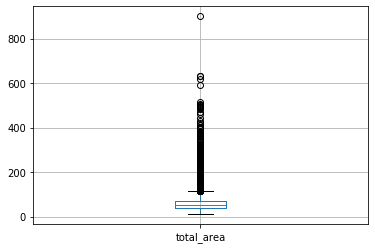

In [42]:
df.boxplot(column='total_area')
plt.show()

Нижний «ус» упирается примерно в 0,1 - минимальное значение. Верхний заканчивается около 100 — это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. Распределение нормальное. 

Посмотрим на список характерных значений.

In [43]:
df['total_area'].describe().round(2)

count    23699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

Визуализируем данные.

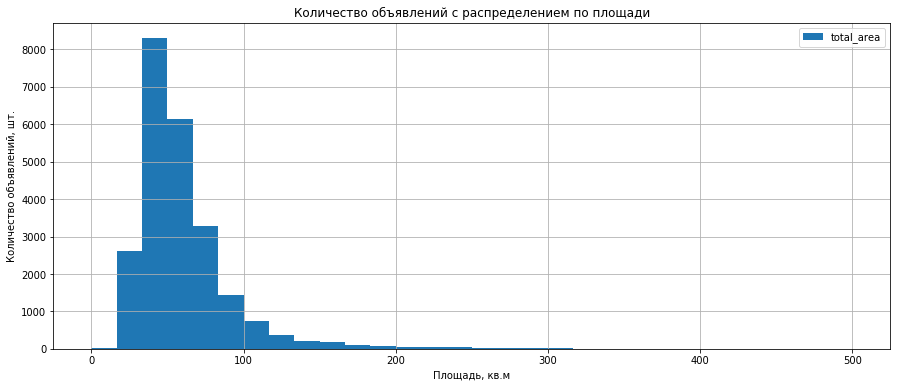

In [44]:
df.plot(
    y = 'total_area',
    kind = 'hist',
    bins = 30,
    grid=True,
    figsize = (15,6),
    range = (0,500)
)
plt.title('Количество объявлений с распределением по площади')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество объявлений, шт.')
plt.show()

**Вывод**

Общая площадь от 12 до 900 м2, среднее значение 60, а медиана 52 м2. 

#### Цена

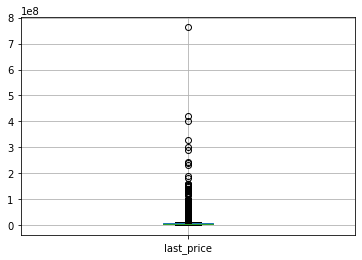

In [45]:
df.boxplot(column='last_price')
plt.show()

Много выбросов, но на распределение это не влияет. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.

Посмотрим на список характерных значений.

In [46]:
df['last_price'].describe().apply(lambda x: '{:.2f}'.format(x))

count        23699.00
mean       6541548.77
std       10887013.27
min          12190.00
25%        3400000.00
50%        4650000.00
75%        6800000.00
max      763000000.00
Name: last_price, dtype: object

Встречаются аномальные значения, такие как минимальная стоимость ```12190.00```. Посмотрим на остальные данные этого объявления.

In [47]:
df[df['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_weekday,publication_month,publication_year,floor_category,living_area_ratio,kitchen_area_ratio
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,0,NaN,8,111.8,2,3,2019,последний,0.293578,0.37156


Видим, что с такой площадью и количеством комнат, данная цена невозможна, следовательно в данных ошибка. Отфильтруем данные.

In [48]:
df_filter_price = df.query('last_price != 12190')

In [49]:
df_filter_price['last_price'].describe().apply(lambda x: '{:.2f}'.format(x))

count        23698.00
mean       6541824.30
std       10887160.35
min         430000.00
25%        3400000.00
50%        4650000.00
75%        6800000.00
max      763000000.00
Name: last_price, dtype: object

Визуализируем данные.

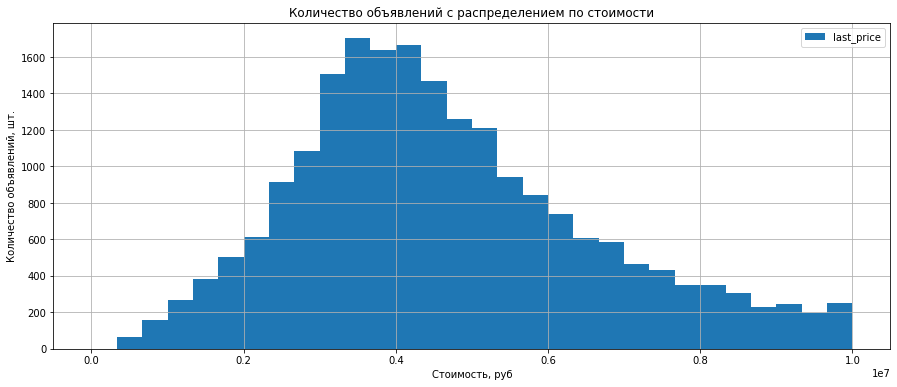

In [50]:
df_filter_price.plot(
    y = 'last_price', 
    kind = 'hist', 
    bins = 30, grid=True, 
    figsize = (15,6), 
    range = (0,10000000)
)
plt.title('Количество объявлений с распределением по стоимости')
plt.xlabel('Стоимость, руб')
plt.ylabel('Количество объявлений, шт.')
plt.show()

**Вывод**

Цены от ```430000,00``` до ```763000000,00```, среднее значение ```6541824.30```, а медиана ```4650000.00```. 

#### Число комнат

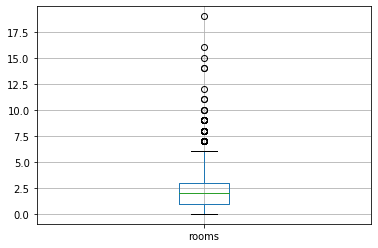

In [51]:
df.boxplot(column='rooms')
plt.show()

Нижний «ус» упирается в 0 - минимальное значение. Верхний заканчивается около 6 — это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы. Значения, которые отсёк верхний «ус», — редкие. Распределение нормальное.

Посмотрим на список характерных значений.

In [52]:
df['rooms'].describe().round(2)

count    23699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Встречаются аномалии со значением ```0``` и ```19```. Посмотрим на остальные данные этих объявлений.

In [53]:
df[df['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_weekday,publication_month,publication_year,floor_category,living_area_ratio,kitchen_area_ratio
144,1,2450000,27.00,2017-03-30,0,2.65,24,15.50,2,True,...,NaN,NaN,181,90740.7,3,3,2017,другой,0.574074,NaN
349,4,2320000,25.00,2017-09-27,0,2.65,14,17.00,1,True,...,NaN,NaN,45,92800.0,2,9,2017,первый,0.680000,NaN
440,8,2480000,27.11,2018-03-12,0,2.65,17,24.75,4,True,...,2,982,64,91479.2,0,3,2018,другой,0.912947,NaN
508,0,3375000,34.40,2017-03-28,0,2.65,26,24.30,19,True,...,1,593,430,98110.5,1,3,2017,другой,0.706395,NaN
608,2,1850000,25.00,2019-02-20,0,2.65,10,18.00,7,True,...,NaN,NaN,29,74000.0,2,2,2019,другой,0.720000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.65,25,18.00,16,True,...,1,623,14,123076.9,4,9,2017,другой,0.692308,NaN
23442,0,2500000,27.70,2017-09-28,0,2.65,24,18.00,4,True,...,NaN,NaN,4,90252.7,3,9,2017,другой,0.649819,NaN
23554,15,3350000,26.00,2018-09-07,0,2.65,19,17.00,8,True,...,2,112,31,128846.2,4,9,2018,другой,0.653846,NaN
23592,10,1450000,29.00,2017-11-11,0,2.65,9,18.00,8,True,...,NaN,NaN,82,50000.0,5,11,2017,другой,0.620690,NaN


Отсальные данные выглядят корректно, однако видим, что в столбце с соотношением площади кухни к общей площади пустые значения, делаем вывод, данные объявления подразумевают продажу квартир. Тем не менее необходимо уточнить данную информацию у операторов по внесению данных.

In [54]:
df[df['rooms'] == 19]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,publication_weekday,publication_month,publication_year,floor_category,living_area_ratio,kitchen_area_ratio
14498,6,32250000,374.6,2018-06-09,19,2.65,5,264.5,2,True,...,2,548,114,86091.8,5,6,2018,другой,0.706086,0.073679


Общая площадь равна ```374.6``` м, в ```4``` км от центра города, следовательно данное объявление можно считать правдивым, а учитывая, что исследование идет в том числе по Санкт-Петербургу, то ```19``` комнат - далеко не [самое большое число комнат](https://paperpaper.ru/eto-samaya-bolshaya-kommunalka-v-peterb/#:~:text=16%20%D0%BA%D0%B0%D0%B4%D1%80%D0%BE%D0%B2,%D0%9A%D0%BE%D0%BC%D0%BC%D1%83%D0%BD%D0%B0%D0%BB%D0%BA%D0%B0%20%D0%BE%D1%84%D0%B8%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%20%D0%BD%D0%B5%D0%BF%D1%80%D0%B8%D0%B3%D0%BE%D0%B4%D0%BD%D0%B0%20%D0%B4%D0%BB%D1%8F%20%D0%B6%D0%B8%D0%B7%D0%BD%D0%B8.)

Визуализируем данные.

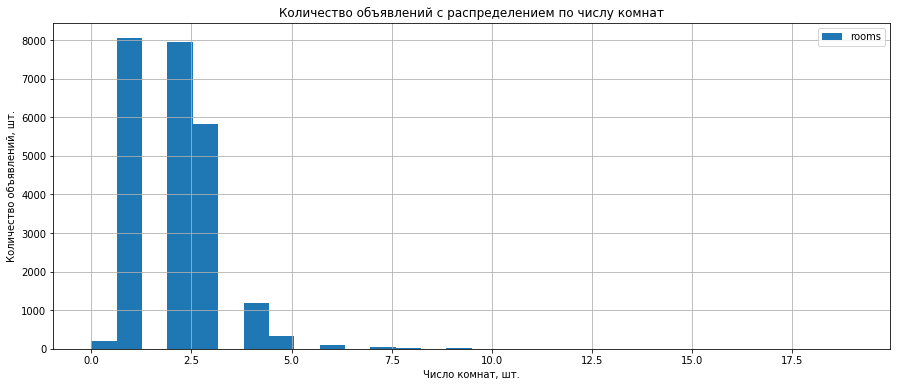

In [55]:
df.plot(
    y = 'rooms', 
    kind = 'hist', 
    bins = 30, 
    grid=True, 
    figsize = (15,6)
)
plt.title('Количество объявлений с распределением по числу комнат')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

**Вывод**

Число комнат от ```0,00``` до ```19,00```, среднее значение ```2.07```, а медиана ```2.00```. 

#### Высота потолков

KeyError: "None of [Index(['ceiling_height'], dtype='object')] are in the [columns]"

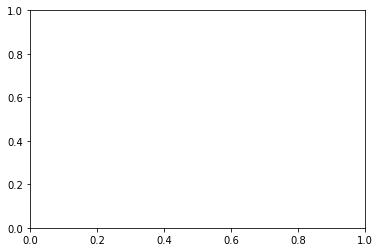

In [56]:
df.boxplot(column='ceiling_height')
plt.show()

Много выбросов, но на распределение это не влияет. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.

Посмотрим на список характерных значений.

In [57]:
df['ceiling_height'].describe().round(2)

count     23699.00
unique      184.00
top           2.65
freq       9195.00
Name: ceiling_height, dtype: float64

Встречаются аномалии со значением ```1``` и ```100``` м. Cогласно [СНиП 2.08.01-89*](https://docs.cntd.ru/document/5200164) **п. 1.1 Общих указаний** - *"Высота жилых помещений от пола до потолка  должна быть не менее 2,5 м,  для климатических подрайонов IА, IБ, IГ, IД, IIА - не менее 2,7 м."*. Отфильтуем данные по минимальной высоте потолка в ```2.5``` м, учитывая, что данные собраны в и в Санкт-Петербурге максимальное значение по высоте потолка отфильтруем до ```9``` м

In [58]:
df_filter_ceiling = df.query('ceiling_height > 2.5 and ceiling_height < 9')

TypeError: '>' not supported between instances of 'str' and 'float'

In [ ]:
df_filter_ceiling['ceiling_height'].describe().apply(lambda x: '{:.2f}'.format(x))

Визуализируем данные.

In [ ]:
df_filter_ceiling.plot(
    y = 'ceiling_height', 
    kind = 'hist', 
    bins = 30, 
    grid=True, 
    figsize = (15,6), 
    range = (0,5)
)
plt.title('Количество объявлений с распределением по высоте потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений, шт.')
plt.show()

**Вывод**

В диапозоне от ```2.5``` до ```9``` метров, среднее значение ```2.77```, а медиана ```2.65```.

#### Вывод по площади, числу комнат и высоте потолков.

- средняя площадь квартир в публикуемых объявлениях - ```60``` м2;
- средняя стоимость проданных квартир - ```6541548.77``` руб;
- средняя высота потолков в публикуемых объявлениях - ```2.77``` м.

### Время продажи квартиры

Изучим время продажи квартиры. 

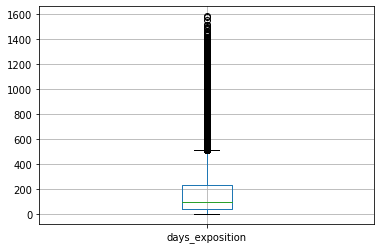

In [59]:
df.boxplot(column='days_exposition')
plt.show()

Нижний «ус» упирается в 0 - минимальное значение. Верхний заканчивается около 500 — это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы. Распределение нормальное. Следовательно необоснованно быстрых значений нет, а необоснованно долгие объявления лежат за границей в ```500``` дней.

Посмотрим на список характерных значений.

In [60]:
df['days_exposition'].describe().round(2)

count    20518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max       1580.00
Name: days_exposition, dtype: float64

Время продажи от ```1,00``` до ```1580.00```, среднее значение ```180.89```, а медиана ```95.00```.

Визуализируем данные.

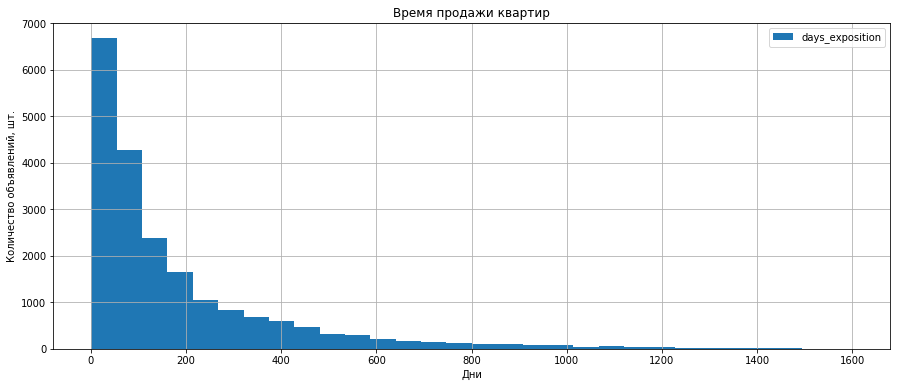

In [61]:
df.plot(
    y = 'days_exposition', 
    kind = 'hist', 
    bins = 30, 
    grid = True, 
    figsize = (15,6), 
    range = (1,1600)
)
plt.title('Время продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений, шт.')
plt.show()

Увеличим количество корзин до ```100``` и изменим масштаб изменив значения от ```0``` до ```200```.

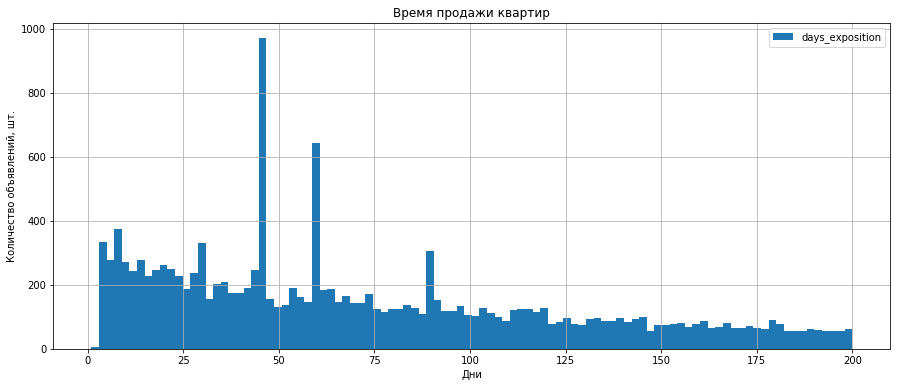

In [62]:
df.plot(
    y = 'days_exposition', 
    kind = 'hist', 
    bins = 100, 
    grid = True, 
    figsize = (15,6), 
    range = (1,200)
)
plt.title('Время продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений, шт.')
plt.show()

Видим характерные выбросы. 

Найдем их точное значение.

In [63]:
df[df['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
762       1
842       1
890       1
906       1
1223      1
Name: days_exposition, Length: 1141, dtype: int64

Наиболее популярное количество дней до снятия объявления ```45```, ```60```, ```7```, ```30```, ```90```. 

Согласно [правилам размещения объевлений Яндекс.Недвижимость](https://yandex.ru/support/realty/paid.html#paid) сроки публикации в Санкт-Петербурге и их областях, вне какой либо зависимости от цены квартиры и прочего, равен ```120``` дней для бесплатных объявлений и для платных ```30``` дней с автоматическим автопродлением из кошелька в кабинете или с привязанной банковской карты, поэтому вероятно, что в эти дни происходит автоматическое снятие объявлений. Значения ```45``` и ```7``` являются аномальными и требуют уточнения у операторов сбора данных.

Отфильтруем редкие и выбивающиеся значения.

In [64]:
df_filter_date = df.query(
    'days_exposition != 45 and days_exposition != 60 and days_exposition != 7 and days_exposition != 30 and days_exposition != 90 and days_exposition != 0')

Визуализируем данные.

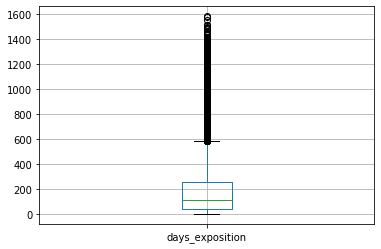

In [65]:
df_filter_date.boxplot(column='days_exposition')
plt.show()

Нижний «ус» также упирается в 0 - минимальное значение. Верхний поднялся до около 600 — это ориентировочная граница нормального размаха. Всё, что лежит за ней - выбросы. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много. Распределение все также, нормальное.

Посмотрим изменился ли список характерных значений.

In [66]:
df_filter_date['days_exposition'].describe().round(2)

count    18454.00
mean       195.80
std        226.76
min          1.00
25%         44.00
50%        114.00
75%        259.00
max       1580.00
Name: days_exposition, dtype: float64

Здесь явные изменения. Минимальное и максимальное значение все также от ```1,00``` до ```1580.00```, но среднее значение поднялось с ```180.89``` до ```195.80```, а медиана c ```95.00``` до ```114.00```. 

Визуализируем данные.

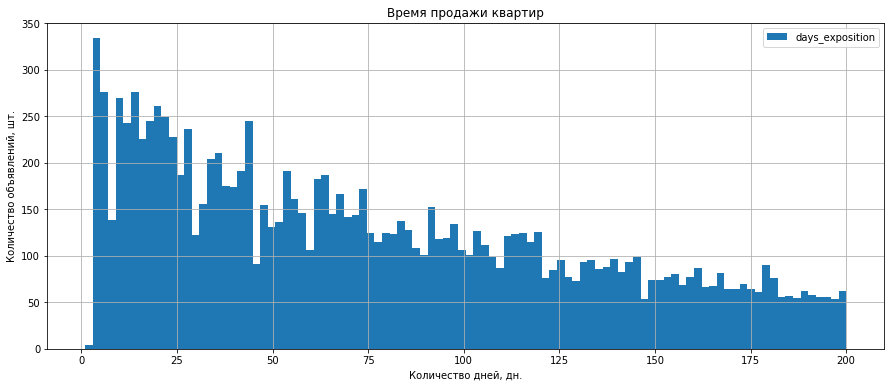

In [67]:
df_filter_date.plot(
    y = 'days_exposition', 
    kind = 'hist', 
    bins = 100, 
    grid = True, 
    figsize = (15,6), 
    range = (1,200)
)
plt.title('Время продажи квартир')
plt.xlabel('Количество дней, дн.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

**Вывод**

Ожидаемо, в очищенных данных получаем большие значения медианы и среднего значения - ```114``` и ```195,80```. Нормальные значения поднялись от ```1``` до приблизительно ```600``` дней.

#### Вывод

- объявления снимаются автоматически по истечении ```30```, ```60```, ```90```, ```120``` дней, как раз в эти даты были заметны некоторые пики снятия объявлений;
- пики со значением ```7``` и ```45``` являются аномальными и требуеют уточнения у операторов по внесению данных;
- средние период размещения объявлений является ```195,8```, следовательно все что является меньше среднего значения является быстрой продажей, а все что больше - необычно долгой продажей.

### Зависимость цены от каких-либо значений.

#### Зависимость от площади.

In [68]:
df[['total_area', 'price_square_meter']].corr()

,total_area,price_square_meter
total_area,1.00000,0.30196
price_square_meter,0.30196,1.00000


Зависимость, согласно корреляции Пирсона - ```0.30196```. Корреляция слабая положительная, связь между 2-мя переменными минимальна. 

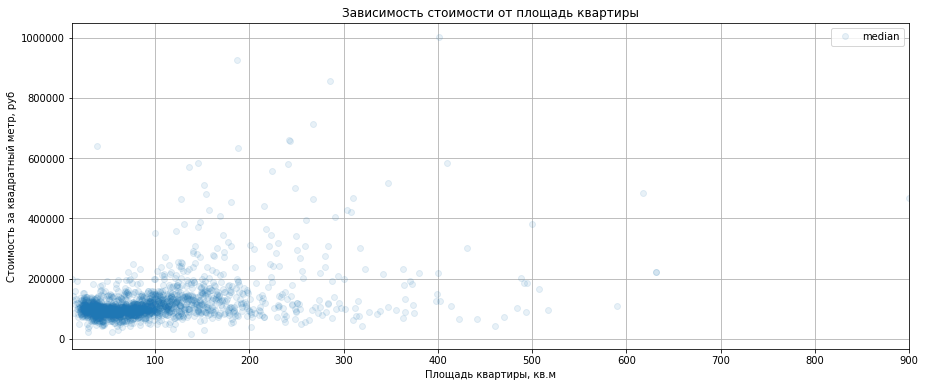

In [69]:
pivot_table_total_area = df.pivot_table(
    index = 'total_area', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(
    y = 'median', 
    style = 'o', 
    alpha=0.1, 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от площадь квартиры')
plt.xlabel('Площадь квартиры, кв.м')
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()


**Вывод**

При увеличении площади квартиры, увеличивается ее стоимсоть.

#### Зависимость от числа комнат. 

In [70]:
df[['total_area', 'price_square_meter']].corr()

,total_area,price_square_meter
total_area,1.00000,0.30196
price_square_meter,0.30196,1.00000


Зависимость, согласно корреляции Пирсона - ```0.05542```. Корреляция очень слабая положительная, связь между 2-мя переменными минимальна. 

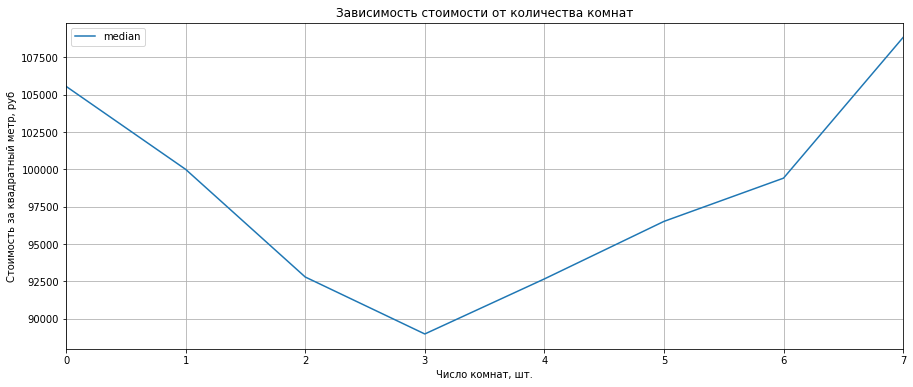

In [71]:
pivot_table_rooms = df.pivot_table(
    index = 'rooms', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True)
plt.title('Зависимость стоимости от количества комнат')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()


**Вывод**

3-х комнатные квартиры являются самыми дешевыми.

#### Зависимость удаленности от расстояния до центра города

In [72]:
df[['cityCenters_nearest', 'price_square_meter']].corr()

,cityCenters_nearest,price_square_meter
cityCenters_nearest,1.000000,-0.317951
price_square_meter,-0.317951,1.000000


Зависимость, согласно корреляции Пирсона - ```-0.317951```. Корреляция слабая отрицательная, связь между 2-мя переменными минимальна. 

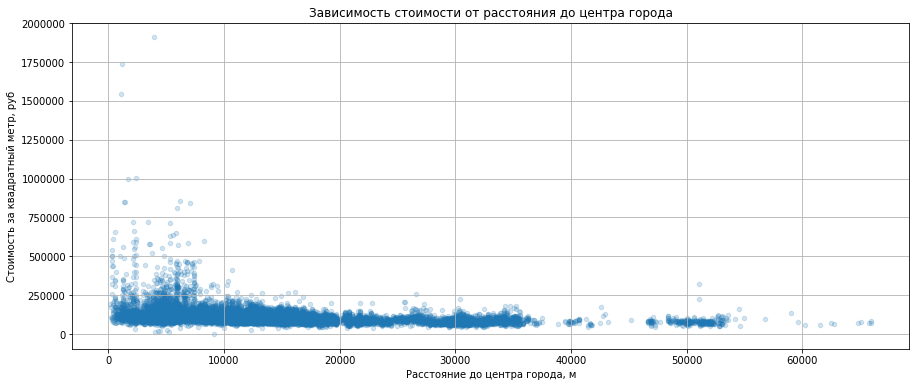

In [73]:
df.plot(
    kind = 'scatter', 
    y = 'price_square_meter', 
    x = 'cityCenters_nearest', 
    alpha = 0.2, 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от расстояния до центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

**Вывод**

При отдаленности от центра от центра уменьшается стоимость.

#### Зависимость от этажа.

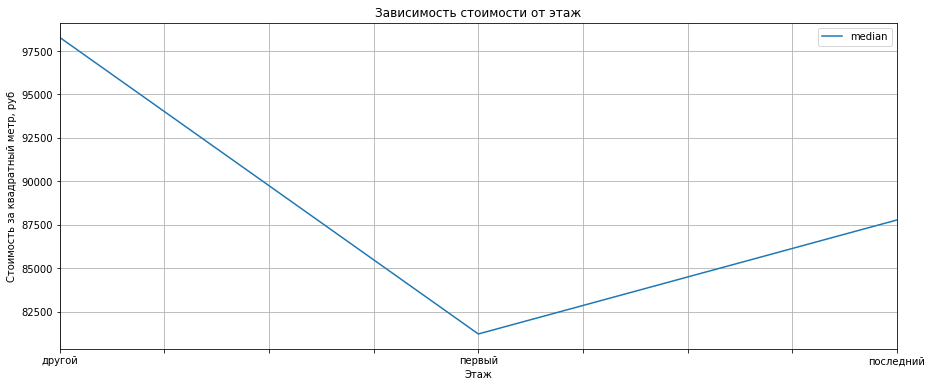

In [74]:
floor_grp = df.pivot_table(
    index = 'floor_category', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
floor_grp.columns = ['mean', 'count', 'median']
floor_grp.plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True)
plt.title('Зависимость стоимости от этаж')
plt.xlabel('Этаж')
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

**Вывод**

Стоимость квартир на первом этаже меньше, чем на последнем и других этажах.

#### Зависимость от даты размещения.

- день недели

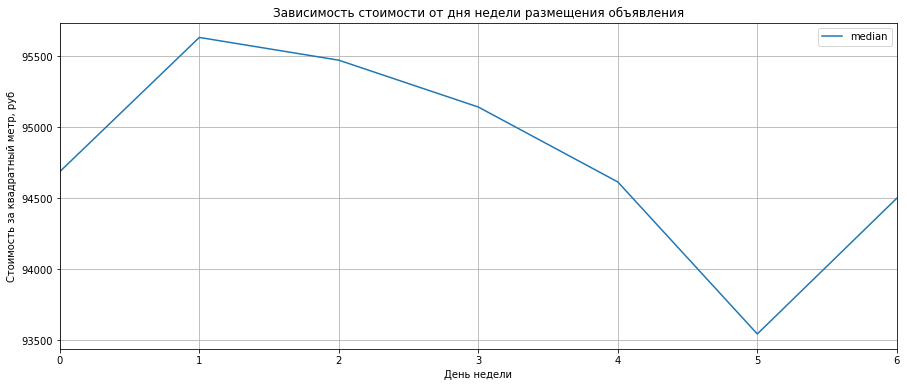

In [75]:
floor_grp = df.pivot_table(
    index = 'publication_weekday', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
floor_grp.columns = ['mean', 'count', 'median']
floor_grp.plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от дня недели размещения объявления') 
plt.xlabel('День недели') #где 0 - это понеделиник, а 6 - воксресенье
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

Пик по вторникам.

- месяц

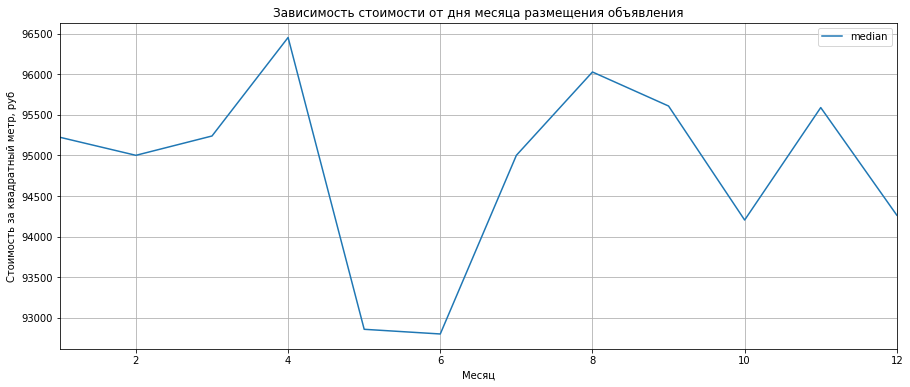

In [76]:
floor_grp = df.pivot_table(
    index = 'publication_month', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
floor_grp.columns = ['mean', 'count', 'median']
floor_grp.plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от дня месяца размещения объявления')
plt.xlabel('Месяц')  #где 2 - февраль, а 12 - декабрь
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

Пики в апреле, августе и декабре. Характерное падение в период с мая по июнь.

- год

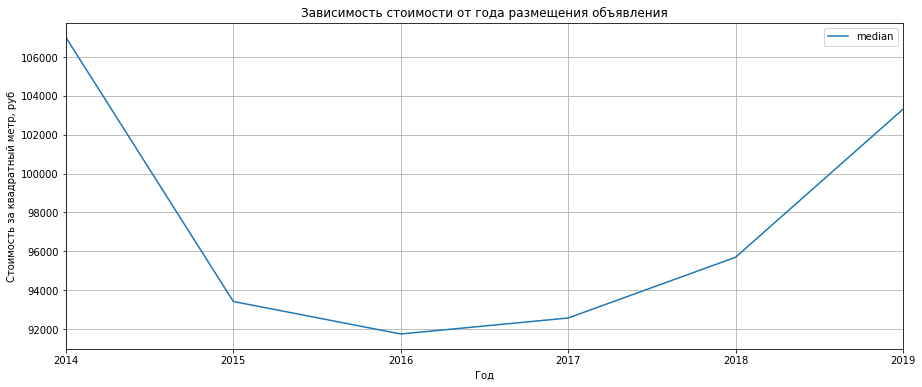

In [77]:
floor_grp = df.pivot_table(
    index = 'publication_year', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
floor_grp.columns = ['mean', 'count', 'median']
floor_grp.plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от года размещения объявления')
plt.xlabel('Год') 
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

Падение цен в период с 2014 по 2016 года, после наблюдается подъем.

#### Вывод по зависимостям.

Такие факторы как площадь, число комнат, удаленность от центра и на каком этаже расположена квартира безусловно влияют на стоимость. 
Очевидные:
- чем больше площадь, тем больше стоимость;
- самые дешевые вартиры находятся на первом этаже;
- чем дальше от центра, тем дороже. 

Неочевидные:
- число комнат. 3-х комнатные оказались самые дешевые, но для более правильного вывода стоит также учитывать площадь данных комнат.

Что же касается влияния дня недели, месяца и года, то нет никаких характерных пиков и падений для каких-либо выводов в зависимости цен к дню недели, но если смотреть на график по месяцам, то видно, что в период с мая по июнь цены очень резко падают и также резко поднимаются, вероятно сезонность праздников и отпусков в России влияет на цены. Что же касается падения цен относительно годов, то здесь основным фактором падения является экономический кризис 2014 года. 

### Населенные пункты 

Выберем 10 населенных пунктов с наибольшим числом объявлений, найдем среднюю цену квадратно метра в этих населенных пунктах.

In [78]:
locality_name_grp = df.pivot_table(
    index = 'locality_name',
    values = 'price_square_meter',
    aggfunc=['count', 'mean']
)
locality_name_grp.columns = ['count', 'mean']
locality_name_grp = locality_name_grp.sort_values('count', ascending = False).round(1)
locality_name_grp.head(10)

,count,mean
locality_name,,
санкт-петербург,15721,114849.0
посёлок мурино,522,85752.2
посёлок шушары,440,78677.4
всеволожск,398,68654.5
пушкин,369,103125.8
колпино,338,75424.6
посёлок парголово,327,90175.9
гатчина,307,68746.1
деревня кудрово,299,92473.5


Найдем населенный пункт с самой высокой стоимостью жилья.

In [79]:
locality_name_grp[locality_name_grp['mean']==locality_name_grp['mean'].max()]

,count,mean
locality_name,,
посёлок лисий нос,2,121616.2


Найдем населенный пункт с самой низкой стоимостью жилья.

In [80]:
locality_name_grp[locality_name_grp['mean']==locality_name_grp['mean'].min()]

,count,mean
locality_name,,
деревня старополье,3,11206.2


#### Вывод

- возглавляет топ-10 населенных пуктов по количеству объявлений Санкт-Петербург со средней ценой за квадратный метр - ```114849.01```; 
- замыкает топ-10 населенных пуктов по количеству объявлений Выборг со средней ценой за квадратный метр - ```58141.91```;
- максимальная стоимость по всем населенным пуктам в поселке Лисий Нос - ```121616.2```;
- минимальная стоимость по всем населенным пуктам в деревне Старополье - ```11206.2```;

### Предложения квартир по центру Санкт-Петербурга.

Создим столбец с расстоянием до центра в километрах - ```cityCenters_nearest_km```, округлим данные до целых значений и посчитаем среднюю цену для каждого километра.

In [81]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round().astype('Int64')
pivot_table_km = df.pivot_table(
    index = 'cityCenters_nearest_km', 
    values = 'price_square_meter', 
    aggfunc = 'mean'
).round(1)
pivot_table_km

,price_square_meter
cityCenters_nearest_km,
0,245833.5
1,176640.7
2,157944.3
3,121299.7
4,133035.8
...,...
61,60606.1
62,69114.5
63,62500.0


Построем график с зависимостью цен от удаленности от центра города.

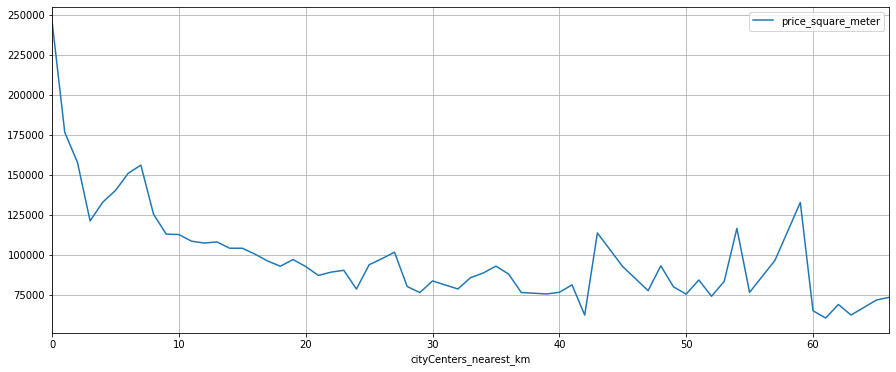

In [82]:
pivot_table_km.plot(
    figsize = (15,6), 
    grid=True
)
plt.show()

#### Вывод

Первое падении цен на графике появляется на отметке примерно ```3``` км, но далее следует также резкий подъем и уже на отметке примерно в ```6```, ```7``` км цены выходят на экстремум и после наблюдается выход цен на плато. Поэтому границу цетра будем считать на отметке в ```7``` км.

### Зависимости цен по центру Санкт- Петербурга.

Выделим сегмент квартир в цетре.

In [83]:
center_spb_df = df.query('cityCenters_nearest_km <= 7 and locality_name == "санкт-петербург"')

Построем гистограммы и изучим данные по следующим данным:
- площадь;
- цена;
- число комнат;
- высота потолков.

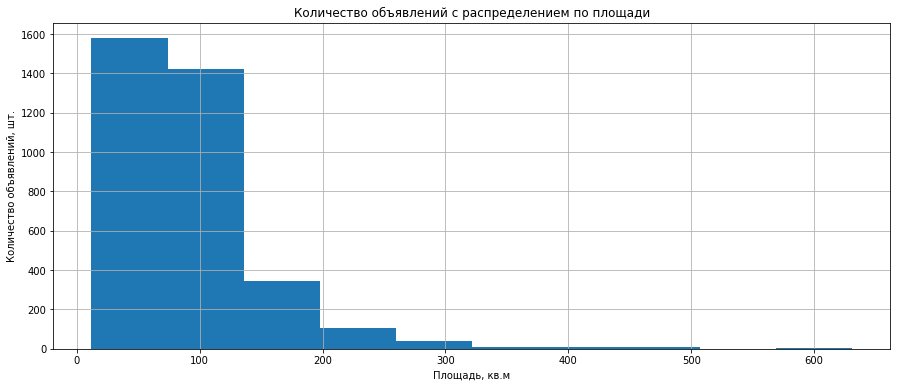

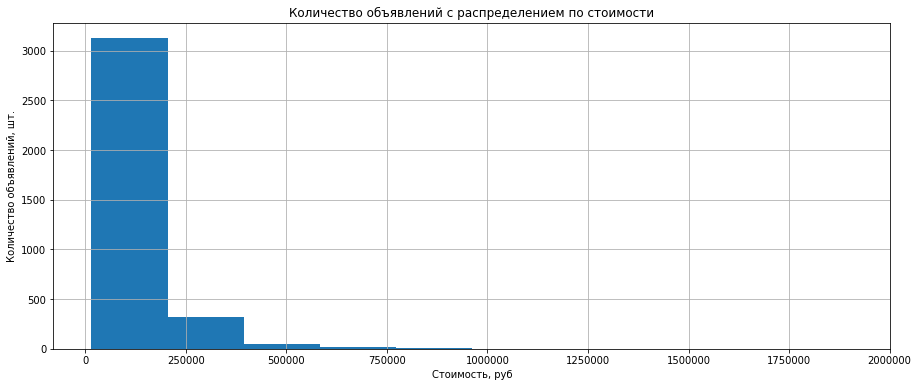

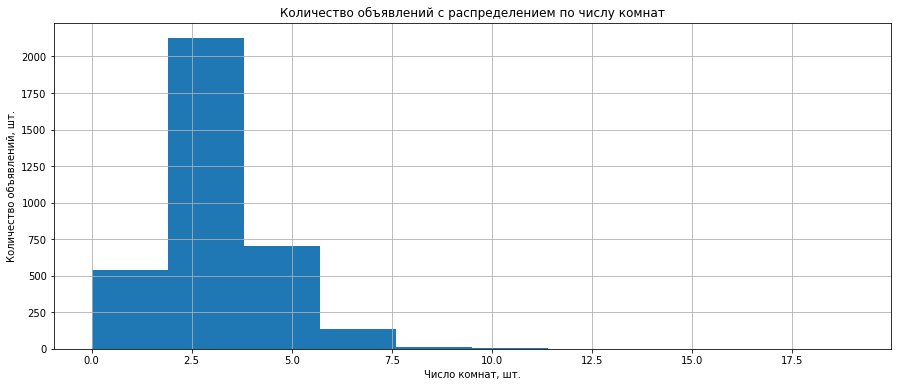

TypeError: '<=' not supported between instances of 'float' and 'str'

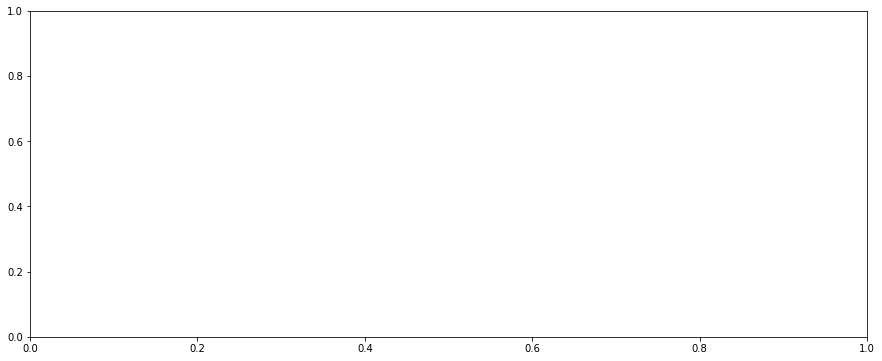

In [84]:
columns = ['total_area', 'price_square_meter', 'rooms', 'ceiling_height']
name = ['Количество объявлений с распределением по площади',
        'Количество объявлений с распределением по стоимости',
        'Количество объявлений с распределением по числу комнат',
        'Количество объявлений с распределением по высоте потолков'
]
name_xlabel = ['Площадь, кв.м', 
               'Стоимость, руб', 
               'Число комнат, шт.', 
               'Высота потолков, м'
]
name_ylabel = 'Количество объявлений, шт.'
for i in range(len(columns)):
    center_spb_df[columns[i]].hist(figsize = (15,6), grid=True)
    plt.title(name[i])
    plt.xlabel(name_xlabel[i])
    plt.ylabel(name_ylabel)
    plt.show()

- больше всего продают квартиры до ```100``` кв.м;
- больше всего квартир с ценой до ```200000``` руб;
- больше всего квартир с числом комнат - ```3``` шт.;
- больше всего квартир с высотой потолков до ```10``` м.

#### Зависимость от числа комнат.

In [ ]:
center_spb_df[['rooms', 'price_square_meter']].corr()

Зависимость, согласно корреляции Пирсона - ```0.041444```. Корреляция очень слабая положительная, связь между 2-мя переменными минимальна или отсутствует вовсе. 

In [ ]:
center_spb_rooms = center_spb_df.pivot_table(
    index = 'rooms', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от количества комнат')
plt.xlabel('Число комнат, шт.')
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

**Вывод**

Чем ближе количество комнат к ```6```, тем ниже стоимость квадратного метра. 

#### Зависимость от этажа.

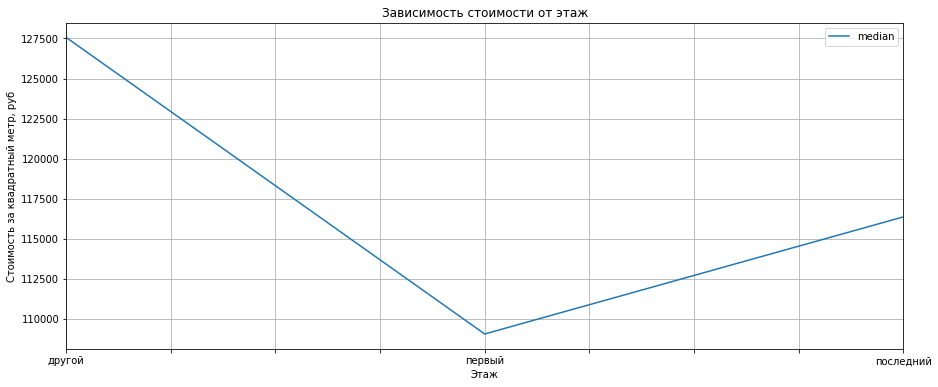

In [85]:


center_spb_floor = center_spb_df.pivot_table(
    index = 'floor_category', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
center_spb_floor.columns = ['mean', 'count', 'median']
center_spb_floor.plot(
    y = 'median' ,   
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от этаж')
plt.xlabel('Этаж')
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

**Вывод**

Стоимость квартир на первом этаже меньше, чем на последнем и других этажах.

#### Зависимость удаленности от центра.

In [86]:
center_spb_df[['cityCenters_nearest', 'price_square_meter']].corr()

,cityCenters_nearest,price_square_meter
cityCenters_nearest,1.00000,-0.01725
price_square_meter,-0.01725,1.00000


Зависимость, согласно корреляции Пирсона - ```-0.157669```. Корреляция слабая отрицательная, связь между 2-мя переменными минимальна. 

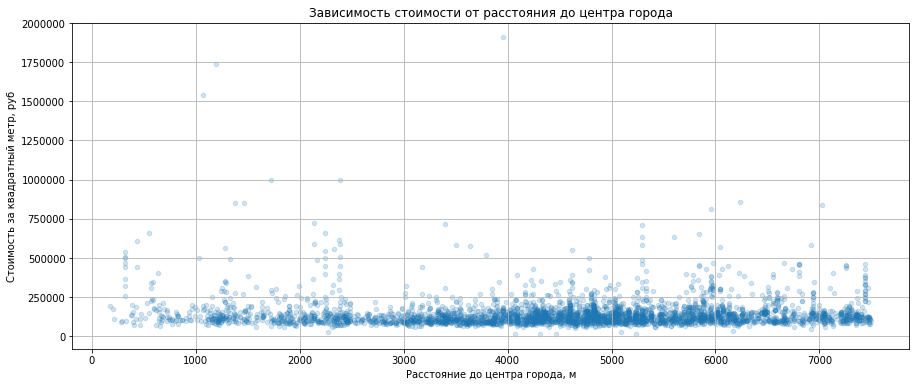

In [87]:
center_spb_df.plot(
    kind = 'scatter', 
    y = 'price_square_meter', 
    x = 'cityCenters_nearest', 
    alpha = 0.2, 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от расстояния до центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

**Вывод**

Удаленность от центра по выборке с радиусом ```10``` км не имеет четкой зависимости.

#### Зависимость от даты размещения

- день недели

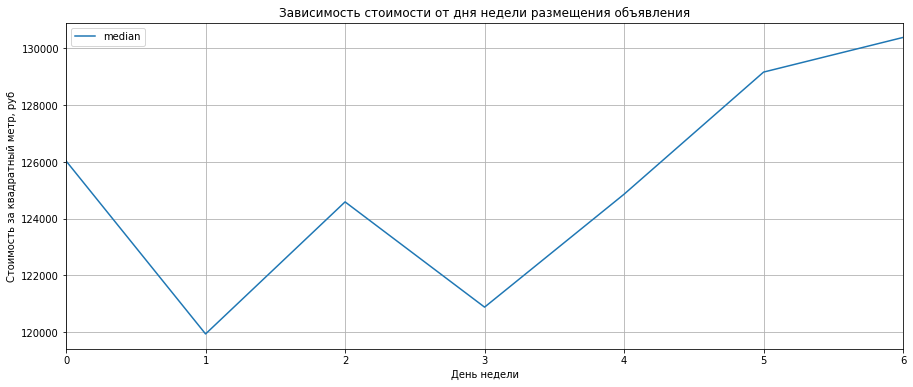

In [88]:
floor_grp = center_spb_df.pivot_table(
    index = 'publication_weekday', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
floor_grp.columns = ['mean', 'count', 'median']
floor_grp.plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от дня недели размещения объявления') 
plt.xlabel('День недели') #где 0 - это понеделиник, а 6 - воксресенье
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

Пики по средам, субботам и воскресеньям 

- месяц

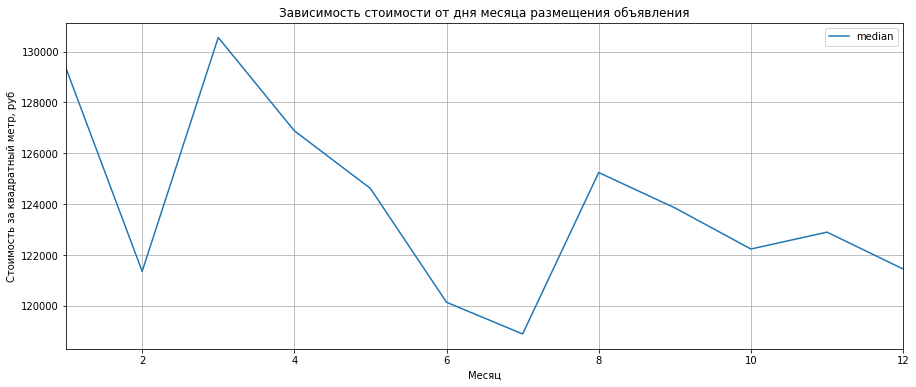

In [89]:
floor_grp = center_spb_df.pivot_table(
    index = 'publication_month', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
floor_grp.columns = ['mean', 'count', 'median']
floor_grp.plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от дня месяца размещения объявления')
plt.xlabel('Месяц')  #где 2 - февраль, а 12 - декабрь
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

Пики в марте, августе. Характерное падение в период с апреля по июнь и с ноября по февраль.

- год

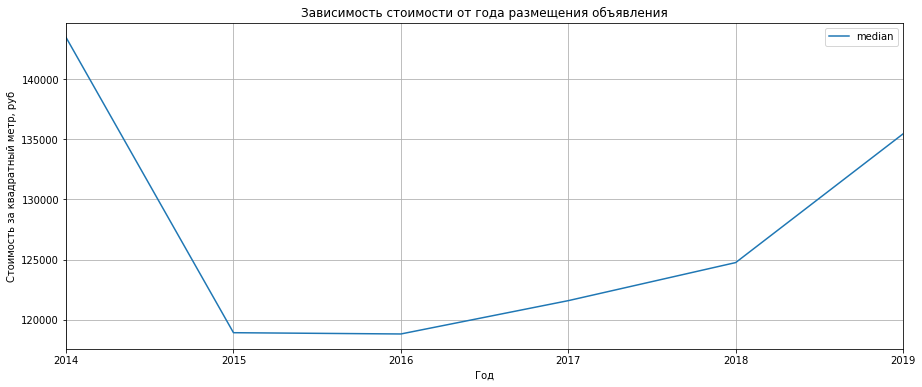

In [90]:
floor_grp = center_spb_df.pivot_table(
    index = 'publication_year', 
    values = 'price_square_meter', 
    aggfunc = ['mean', 'count', 'median']
)
floor_grp.columns = ['mean', 'count', 'median']
floor_grp.plot(
    y = 'median', 
    figsize = (15,6), 
    grid=True
)
plt.title('Зависимость стоимости от года размещения объявления')
plt.xlabel('Год') 
plt.ylabel('Стоимость за квадратный метр, руб')
plt.show()

Падение цен в период с 2014 по 2016 года, после наблюдается подъем.

#### Вывод зависимости цен по центру Санкт-Петербурга.

- в отличии от общей выборки характерно выделяется зависимость цен от числа комнат. Так, 6-ти комнатные квартиры стоят меньше всего в отличии от всей выборки, где это были 3-х комнтаные квартиры. Но и в том, и в другом случае стоит учитывать площадь данных комнат. Так, 6-ти комнатная квартира в центра Санкт-Петербурга может оказаться старой комммуналкой с очень малой площадью данных комнат;
- этаж квартиры без каких либо отличий от общей выборки - квартиры на 1 этаже дешевле всех;
- удаленность квартиры от центра города имеет зависимость но очень слабую, т.к. выборка уже сделана по центру города;
- влияние дня недели, месяца и года имеет некоторые отличия в зависимости от месяца - в центре Санкт-Петербурга характерными периодами падения цен являются апрель-июнь и ноябрь-февраль, что говорит о том, что наиболее выгодным для продажи и наиболее невыгодным для покупки недвижимости является лето. 

## Общий вывод

1. Были определены и изучены пропущенные значения. В большинстве случае с пропусками оставили пустые значения, т.к. нет данных на которые можно было бы осуществить привязку. Необходимо уточнить информацию у операторов по сбору данных по поводу этих пропусков.
2. Для более эффективного анализа были добавлены данные с ценой квадратного метра, с днем недели, месяцем и годом публикации, с категоризацией этажей, с отношением жилой площади к общей площади и соотвешение площади кухни к общей площади.
3. Средняя площадь квартир в публикуемых объявлениях - 60 м2, средняя стоимость проданных квартир - 6541548.77 руб, а средняя высота потолков в публикуемых объявлениях - 2.77 м.
4. Согласно правилам размещения объявлений на Яндекс.Недвижимость, обявления снимаются автоматически по истечении 30, 60, 90, 120 дней, именно этот фактор и мог повлиять на пиковые значения в данных. Но также выявились значения - ```7``` и ```45``` дней, здесь необходимо уточненить информацию у операторов по внесению данных;
5. Все что является меньше среднего значения - ```195,8``` дней, является быстрой продажей, а все что больше - необычно долгой продажей.
6. Площадь, число комнат, удаленность от центра и на каком этаже расположена квартира (согласоно данным по всем населенным пуктам) оказывают влияние на стоимость. Очевидные - площадь, этаж, удаленность от центра. Неочевидные - число комнат - 3-х комнатные оказались самые дешевые, но для более правильного вывода стоит также учитывать площадь данных комнат.
7. Влияние периодов по дате размещения:
- день недели не оказывает какого-либо характерного и систематического влияния на стоимость;
- впериод с мая по июнь цены очень резко падают и также резко поднимаются - лучшее наиболее выгодным для продажи и наиболее невыгодное время для покупки, является период с июня по сентябрь.;
- экономический кризис 2014 года существуенно повлиял на цены, но после этой отметки стоимость недвижимости только растет.
8. Лидирует по количеству объявлений Санкт-Петербург со средней ценой за квадратный метр - ```114849.01```, замыкает топ-10 населенных пуктов по количеству объявлений Выборг со средней ценой за квадратный метр - ```58141.91```, максимальная стоимость по всем населенным пуктам в поселке Лисий Нос - ```121616.2```, минимальная стоимость по всем населенным пуктам в деревне Старополье - ```11206.2```;
9. Анализируя данные Санкт-Петербурга в радиусе в 10 км от цетра города были сделаны сл. выводы:
- больше всего продают квартиры до 100 м²;
- больше всего квартир с ценой до 200000 руб/м²;
- больше всего квартир с числом комнат - 3 шт.;
- больше всего квартир с высотой потолков до 10 м.
10. В отличии от всех населенных пунктов на центр Санкт-Петербурга выделяется зависимость цен от числа комнат - 6-ти комнатные квартиры стоят меньше всего в отличии от всей выборки, где это были 3-х комнтаные квартиры. И в том, и в другом случае стоит учитывать площадь данных комнат. Так, 6-ти комнатная квартира в центра Санкт-Петербурга может оказаться старой комммунальной квартирой с очень малой площадью данных комнат. Зависимсоть этажа не имеет каких-либо отличий от всех населенных пунктов, а удаленность от центра не имеет смысла, т.к. разница в стоимости не существенна. 
11. Влияние периодов по дате размещения в центре Санкт-Петербурга характерно отличаются от всех населенных пунктов только в зависимости от месяца. Наиболее выгодным для продажи и наиболее невыгодным для покупки периодом остается неизменно - это период с июня по сентябрь.
12. Не хватает данных с годом постройки дома/объекта недвижимости. Следует предложить вести регистрацию этих данных.